In [1]:
#ref：https://blog.csdn.net/maiyida123/article/details/117746461
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("total_versio7.csv",usecols=['Growth_rate_fix', 'OwnershipConcentration' , 'Asset_liability'])
data=data.dropna()
data = data[data['Growth_rate_fix'] <= 80]
data


,Growth_rate_fix,OwnershipConcentration,Asset_liability
0,0.021137,24.2288,0.603511
1,0.005887,0.3333,0.200720
6,-0.030410,3.0948,0.359144
7,-0.025072,2.9988,0.565787
8,-0.020410,0.2761,0.470502
...,...,...,...
98760,0.059287,29.9000,0.468064
98761,-0.027066,29.9000,0.463422
98762,0.039081,29.9000,0.484426
98763,0.132539,29.9000,0.499182


/Users/liuyulin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/liuyulin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/liuyulin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/liuyulin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

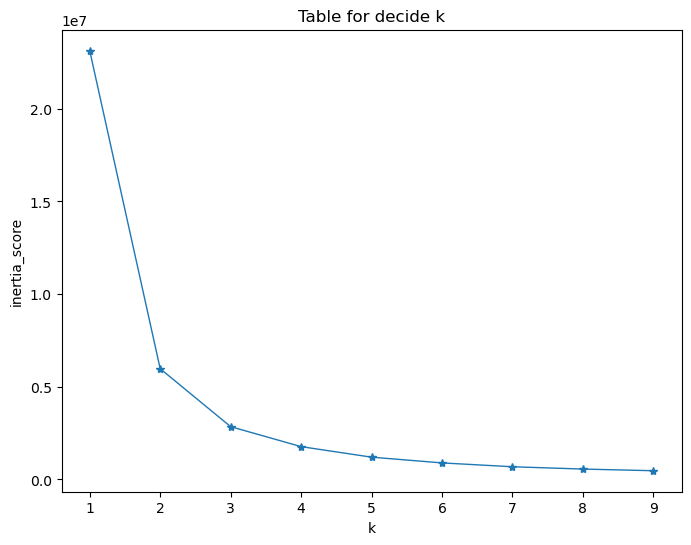

In [2]:
from sklearn.cluster import KMeans
# 选择K的范围 ，遍历每个值进行评估
inertia_list = []
for k in range(1,10):
    model = KMeans(n_clusters = k, max_iter = 500, random_state = 12)
    kmeans = model.fit(data)
    inertia_list.append(kmeans.inertia_)

# 绘图
fig,ax = plt.subplots(figsize=(8,6))    
ax.plot(range(1,10), inertia_list, '*-', linewidth=1)
ax.set_xlabel('k')
ax.set_ylabel("inertia_score") 
ax.set_title('Table for decide k')
plt.show()


In [3]:
k = 2
threshold = 3  # 阈值选择3
model = KMeans(n_clusters = k, max_iter = 500)  # 分为k类
model.fit(data)  # 开始聚类
data['label'] = model.labels_ # 将聚类后的类别标签生成label列

relative_distance = []
for i in range(k):  # 逐一处理
    distance = data.query("label == @i")[['Growth_rate_fix','OwnershipConcentration','Asset_liability']] - model.cluster_centers_[i]  # 计算各点至簇中心点的距离
    absolute_distance = distance.apply(np.linalg.norm, axis = 1)  # 求出绝对距离
    relative_distance.append(absolute_distance / absolute_distance.median())  # 求相对距离并添加
    
data['relative_distance'] = pd.concat(relative_distance)  # 合并


/Users/liuyulin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
data['outlier_3'] = data.relative_distance.apply(lambda x: 1 if x > threshold else 0)
data['outlier_3'].value_counts()

0    75580
1     1297
Name: outlier_3, dtype: int64

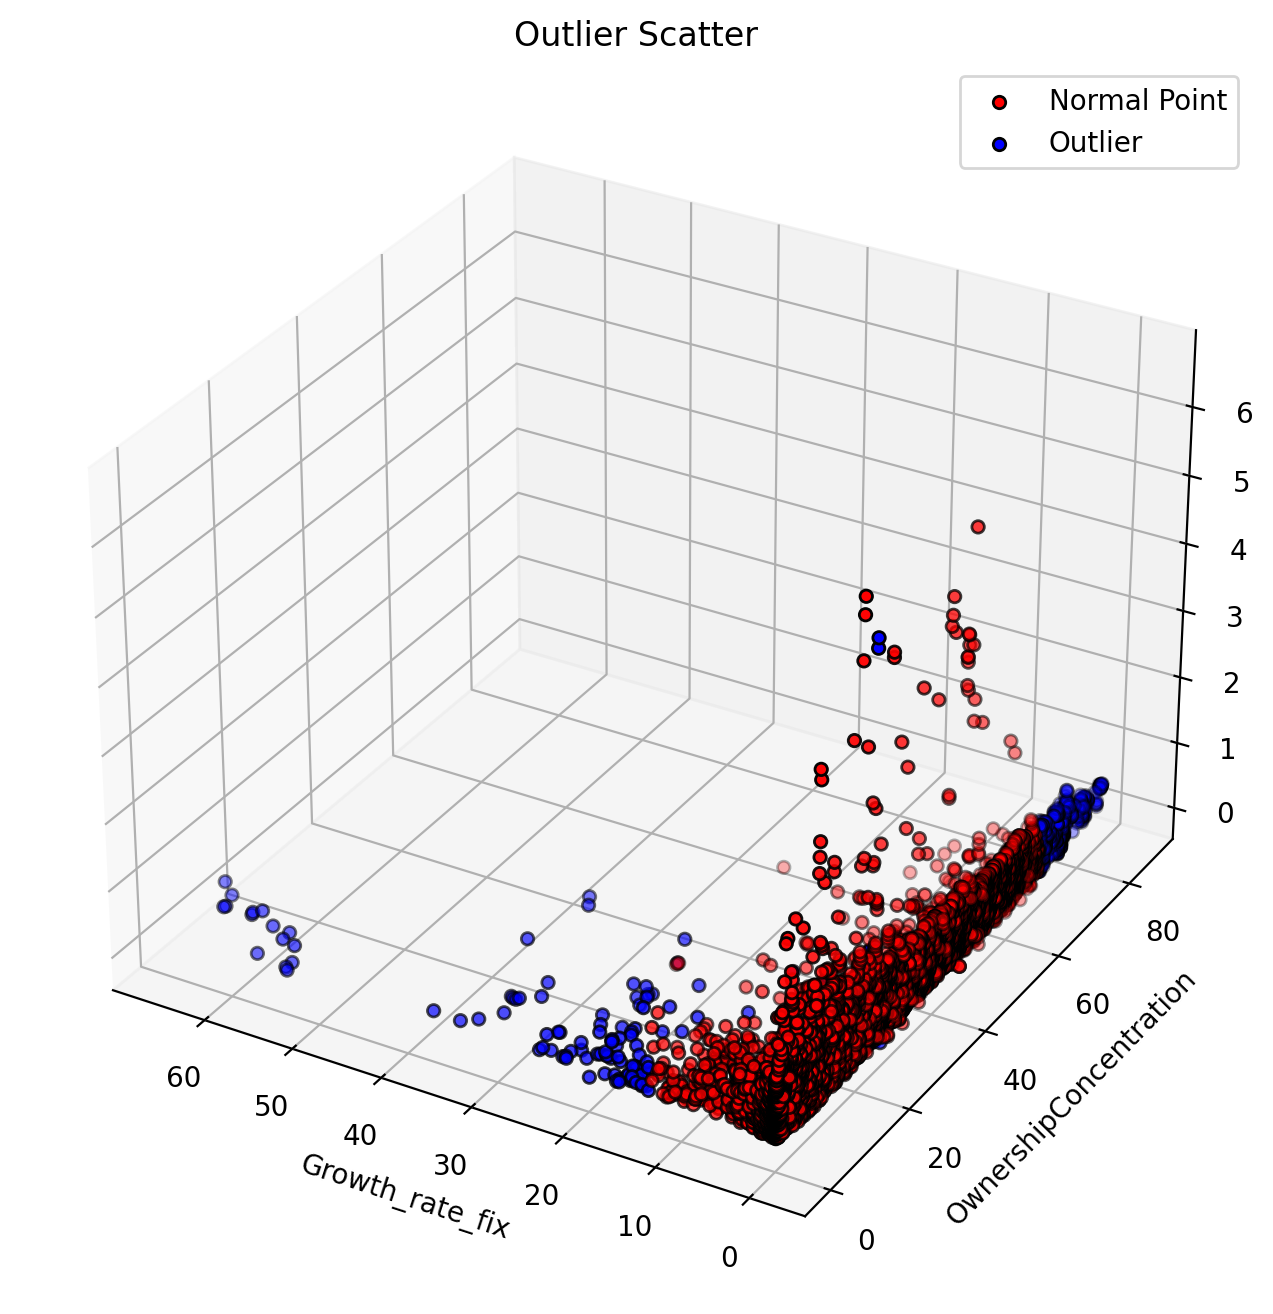

In [5]:
# 查看三维分布图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8), dpi=200)
#ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 30, azim = -60)
ax = fig.add_subplot(projection='3d')

ax1 = ax.scatter(data.query("outlier_3 == 0").Growth_rate_fix, data.query("outlier_3 == 0").OwnershipConcentration, 
                     data.query("outlier_3 == 0").Asset_liability, edgecolor = 'k', color = 'r')
ax2 = ax.scatter(data.query("outlier_3 == 1").Growth_rate_fix, data.query("outlier_3 == 1").OwnershipConcentration, 
                     data.query("outlier_3 == 1").Asset_liability, edgecolor = 'k', color = 'b')
ax.legend([ax1, ax2], ['Normal Point', 'Outlier'])
ax.invert_xaxis()
ax.set_xlabel('Growth_rate_fix')
ax.set_ylabel('OwnershipConcentration')
ax.set_zlabel('Asset_liability')
ax.set_title('Outlier Scatter')
plt.show()

